In [2]:
from IPython.display import Image
%matplotlib inline

In [2]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [4]:
df_mix = pd.read_csv('/Users/zhangsuyu/Desktop/desktop/machine-learning/Database/Plane_Weather_dataset.csv', header = 0)
df_mix.describe()
df_mix.head(5)


,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,Year,Timezone,...,Timezone (2),Visibility (2),DryBulbFarenheit (2),DryBulbCelsius (2),DewPointFarenheit (2),DewPointCelsius (2),RelativeHumidity (2),WindSpeed (2),Altimeter (2),ArrDel15
0,4,19,5,DL,11433,13303,8,1138,2013,-5,...,-5,10.00,86,30.0,71,21.7,61,16,30.04,0
1,4,19,5,DL,14869,12478,17,2336,2013,-7,...,-5,0.25,57,13.9,56,13.3,96,30,29.68,0
2,4,19,5,DL,14057,14869,6,851,2013,-8,...,-7,10.00,51,10.6,29,-1.7,43,0,30.17,0
3,4,19,5,DL,15016,11433,16,1903,2013,-6,...,-5,10.00,40,4.4,28,-2.2,62,21,29.76,1
4,4,19,5,DL,10397,15016,17,1818,2013,-5,...,-6,10.00,42,5.6,25,-3.9,51,7,30.07,0


In [5]:
carrier_mapping = {'WN': 1,
                   'DL' : 2,
                   'UA' : 3,
                   'US' : 4,
                   'EV' : 5,
                   'AA' : 6,
                   'OO' : 7,
                   'B6' : 8,
                   'FL': 9,
                   'MQ': 10}

df_mix['Carrier'] = df_mix['Carrier'].map(carrier_mapping)
df_mix.head(5)
df_mix.dropna()

,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,Year,Timezone,...,Timezone (2),Visibility (2),DryBulbFarenheit (2),DryBulbCelsius (2),DewPointFarenheit (2),DewPointCelsius (2),RelativeHumidity (2),WindSpeed (2),Altimeter (2),ArrDel15
0,4,19,5,2.0,11433,13303,8,1138,2013,-5,...,-5,10.00,86,30.0,71,21.7,61,16,30.04,0
1,4,19,5,2.0,14869,12478,17,2336,2013,-7,...,-5,0.25,57,13.9,56,13.3,96,30,29.68,0
2,4,19,5,2.0,14057,14869,6,851,2013,-8,...,-7,10.00,51,10.6,29,-1.7,43,0,30.17,0
3,4,19,5,2.0,15016,11433,16,1903,2013,-6,...,-5,10.00,40,4.4,28,-2.2,62,21,29.76,1
4,4,19,5,2.0,10397,15016,17,1818,2013,-5,...,-6,10.00,42,5.6,25,-3.9,51,7,30.07,0
5,4,19,5,2.0,15016,10397,19,2133,2013,-6,...,-5,10.00,45,7.2,36,2.2,71,10,30.07,0
6,4,19,5,2.0,10397,14869,21,2356,2013,-5,...,-7,10.00,47,8.3,39,3.9,74,14,30.02,1
7,4,19,5,2.0,10397,10423,21,2333,2013,-5,...,-6,10.00,38,3.3,35,1.7,89,0,30.19,1
8,4,19,5,2.0,11278,10397,19,2055,2013,-5,...,-5,10.00,45,7.2,36,2.2,71,10,30.07,1
9,4,19,5,2.0,14107,13487,15,2043,2013,-7,...,-6,10.00,32,0.0,19,-7.2,59,6,29.94,0


In [8]:
X, y = df_mix.iloc[:300,0:27].values, df_mix.iloc[:300, 28].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
y_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1])

In [144]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(X_train)
X_train = imr.transform(X_train)
#print X_train
imr = imr.fit(X_test)
X_test = imr.transform(X_test)
#print X_test    
imr = imr.fit(y_train)
y_train = imr.transform(y_train)

imr = imr.fit(y_test)
y_test = imr.transform(y_test)
    
# StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

/Users/zhangsuyu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/zhangsuyu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/zhangsuyu/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a

 1) Month                          0.117189
 2) DayofMonth                     0.106727
 3) DayOfWeek                      0.101977
 4) Carrier                        0.066437
 5) OriginAirportID                0.062082
 6) DestAirportID                  0.055204
 7) CRSDepTime                     0.052004
 8) CRSArrTime                     0.044947
 9) Year                           0.039892
10) Timezone                       0.039167
11) Visibility                     0.038163
12) DryBulbFarenheit               0.034428
13) DryBulbCelsius                 0.034080
14) DewPointFarenheit              0.030374
15) DewPointCelsius                0.029969
16) RelativeHumidity               0.029284
17) WindSpeed                      0.024585
18) Altimeter                      0.024141
19) Year (2)                       0.021915
20) Timezone (2)                   0.021234
21) Visibility (2)                 0.009585
22) DryBulbFarenheit (2)           0.008892
23) DryBulbCelsius (2)          

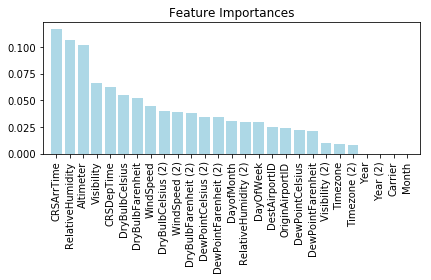

In [145]:
feat_labels = df_mix.columns[:27]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train[0])
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30,
                          feat_labels[f],
                          importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
              importances[indices],
              color='lightblue',
              align='center')

plt.xticks(range(X_train.shape[1]),
            feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [146]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [147]:
svm = SVC(kernel='rbf', C=10, random_state=0, gamma=0.10)
svm.fit(X_train_std[:,:], y_train[0])
print('SVM:')
print('Training accuracy:', svm.score(X_train_std[:,:], y_train[0]))
print('Test accuracy:', svm.score(X_test_std[:,:], y_test[0]))


SVM:
('Training accuracy:', 1.0)
('Test accuracy:', 0.8666666666666667)


In [149]:
print(X_train_std.shape[1])

27


In [150]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[  5.15697284e+00   4.47984063e+00   3.20114901e+00   1.80117324e+00
   1.72097669e+00   1.43005804e+00   1.19224758e+00   9.31326088e-01
   6.41607568e-01   5.64374561e-01   4.79376136e-01   4.11091425e-01
   3.40853669e-01   2.74071336e-01   2.41809865e-01   2.15961375e-01
   1.71236200e-02   9.93359574e-03   1.71175038e-05   3.30840422e-05
   2.59698686e-05   2.44157913e-05  -6.18119128e-17   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


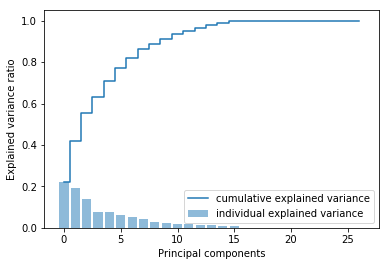

In [151]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
            sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(0,27), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(0,27), cum_var_exp, where='mid', 
          label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [152]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print w

[[ 0.          0.        ]
 [-0.30490609 -0.15812605]
 [-0.30490609 -0.15812605]
 [ 0.          0.        ]
 [-0.11091786  0.22156198]
 [-0.04831347  0.12762095]
 [ 0.04694043  0.12655299]
 [ 0.05093541  0.1620215 ]
 [ 0.          0.        ]
 [ 0.09460078 -0.12969938]
 [-0.13176558 -0.34081625]
 [ 0.11635147 -0.40790388]
 [ 0.11665552 -0.4076864 ]
 [ 0.26894164 -0.22512367]
 [ 0.26867356 -0.22457927]
 [ 0.22165393  0.26042389]
 [ 0.15564341  0.2324644 ]
 [-0.22840513 -0.27141731]
 [ 0.          0.        ]
 [ 0.12825733 -0.16869662]
 [-0.0335095  -0.09569363]
 [ 0.25949518 -0.10345951]
 [ 0.25935656 -0.10286739]
 [ 0.37071267 -0.01454168]
 [ 0.37070931 -0.01439049]
 [ 0.19329654  0.12702931]
 [ 0.08209487  0.06838773]]


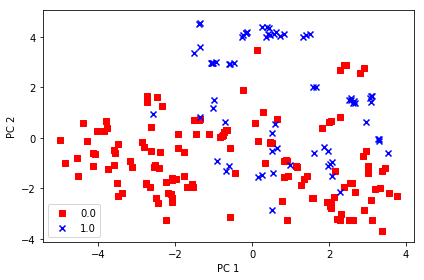

In [153]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train[0]), colors, markers):
    plt.scatter(X_train_pca[y_train[0] == l, 0], 
                X_train_pca[y_train[0] == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [154]:
X_train_std[0].dot(w)

array([ 3.06636445,  1.58169101])

In [155]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [156]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME", n_estimators=600)
bdt.fit(X_train_pca[:,:], y_train[0])
print('Two-class AdaBoostClassifier:')
print('Training accuracy:', bdt.score(X_train_pca[:,:], y_train[0]))
print('Test accuracy:', bdt.score(X_test_pca[:,:], y_test[0]))

Two-class AdaBoostClassifier:
('Training accuracy:', 0.96666666666666667)
('Test accuracy:', 0.77777777777777779)


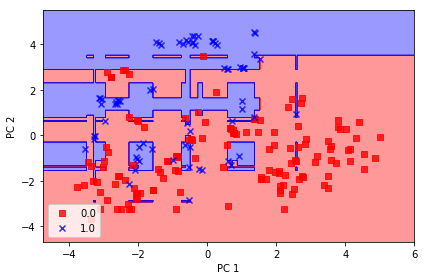

In [157]:
plot_decision_regions(X_train_pca, y_train[0], classifier=bdt)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

In [163]:
svm = SVC(kernel='rbf', C=10, random_state=0, gamma=10)
svm.fit(X_train_pca[:,:], y_train[0])
print('SVM:')
print('Training accuracy:', svm.score(X_train_pca[:,:], y_train[0]))
print('Test accuracy:', svm.score(X_test_pca[:,:], y_test[0]))

SVM:
('Training accuracy:', 1.0)
('Test accuracy:', 0.83333333333333337)


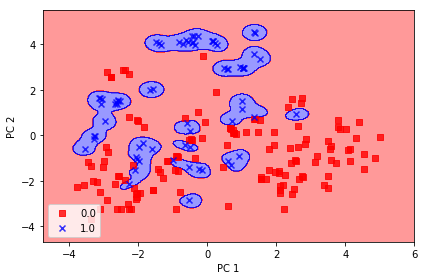

In [164]:
plot_decision_regions(X_train_pca, y_train[0], classifier=svm)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

In [165]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test[0], y_pred=y_pred)
print(confmat)

[[46  3]
 [12 29]]


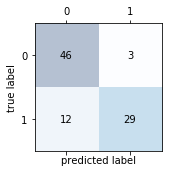

In [166]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [167]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test[0], y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test[0], y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test[0], y_pred=y_pred))

Precision: 0.906
Recall: 0.707
F1: 0.795
